In [1]:
import csv, os
import numpy as np
import pandas as pa
import re
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
path = '/Users/richardbanyi/Developer/itu/2017-dm/lab1/javacode/data.csv'
csv_write = '/Users/richardbanyi/Developer/itu/2017-dm/mini-project/data/data.csv'
# source = open(path, 'r')
# csv_file = open(csv_write, 'w')
# writer = csv.writer(csv_file, delimiter=',', quotechar='"')

In [3]:
# Getting know the data - import as list
# reader = list(csv.reader((line.replace(';;', ';') for line in source), delimiter=';', quotechar='"'))

In [4]:
def filternum(num):
    """Filter out only numbers with regex"""
    
    match = re.match('\d+', str(num))
    if match is not None:
        return int(match.group(0))
    else:
        return np.nan

In [5]:
def genfilter(gender):
    """Normalized Genters two to grups male/female"""
    
    if (gender.lower() == 'male' or 
        gender.lower() == 'm' or
        gender.lower() == 'Man'
       ):
        return 'male'
    if (gender.lower() == 'female' or gender.lower() == 'f'):
        return 'female'
    else:
        return np.nan

In [6]:
def seats(seat):
    """Normalzize seats"""
    
    if len(str(seat)) > 1:
        return np.nan
    else:
        return str(seat)

In [7]:
data = pa.read_csv(csv_write, sep=',', na_values=['unknown', 'Meh', 'none', 'NaN'], header=None, skiprows=1,
                  converters={2: lambda x: genfilter(x),
                              3: lambda x: float(x.replace(',','.')),
                              4: lambda x: float(re.match('\d+', str(x)).group(0)),
                              7: lambda x: x.strip(),
                              39: lambda x: filternum(x),
                              43: lambda x: seats(x),
                              44: lambda x: filternum(x)
                             } 
                  )

In [8]:
data_subset = data.loc[:, [1, 3, 4, 7, 2]]

In [9]:
split = lambda x: pa.Series([i.strip() for i in reversed(re.split('; |,', x.lower()))])

In [10]:
data_subset.columns = ['age', 'shoe_size', 'height', 'language', 'gender']

In [11]:
data_subset.describe()

,age,shoe_size,height
count,67.000000,67.000000,67.000000
mean,40.701493,41.537313,175.298507
std,118.907784,5.915640,25.702856
min,22.000000,2.000000,34.000000
25%,24.000000,40.750000,172.000000
50%,25.000000,42.500000,180.000000
75%,28.000000,44.250000,186.500000
max,999.000000,49.000000,205.000000


In [14]:
data_subset['gender'].value_counts()

male      55
female     9
Name: gender, dtype: int64

In [15]:
data_subset.shape

(67, 5)

In [16]:
data_subset = data_subset.dropna(axis=0)

In [17]:
data_subset.shape

(64, 5)

In [18]:
# Dataframe for Appriori
language = data_subset['language'].apply(split)

In [19]:
# Dataframe  for Classification & Clustering
x_np = data_subset.loc[:, ['age', 'shoe_size', 'height']].as_matrix()
y_np = data_subset.loc[:, ['gender']].as_matrix()

In [20]:
# Standarization
z_scores_np = (x_np - x_np.mean()) / x_np.std()

In [21]:
# Min-Max scalling
np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())

In [30]:
def plot():
    """Plot Normalization"""
    plt.figure(figsize=(8,6))
    
    plt.scatter(x_np[:, 0:1], x_np[:, 1:2], color='green',
               label='Input Scale', alpha=0.5)
    
    #plt.scatter(z_scores_np[:, 0:1], z_scores_np[:, 1:2], color='blue',
    #           label='Standardized with Z-Score', alpha=0.3)
    
    #plt.scatter(np_minmax[:, 0], np_minmax[:, 1], color='red',
    #            label='Min-Max scaled [min=0, max=1]', alpha=0.3)
    
    plt.title('ITU Dataset Normalization')
    plt.xlabel('Age')
    plt.ylabel('Shoes Size')
    plt.legend(loc='upper left')
    plt.grid()
    plt.tight_layout

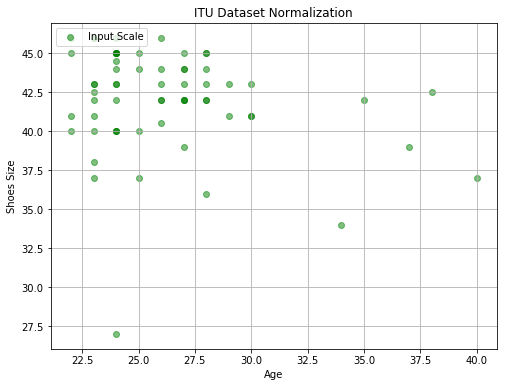

In [32]:
plot()

In [33]:
# Added Class/Target Labels
class_data = np.concatenate((z_scores_np, y_np), axis=1)
class_data_ = np.concatenate((np_minmax, y_np), axis=1)

In [34]:
# Saved data to csv file
np.savetxt("data/z_scores.csv", class_data, delimiter=",", fmt="%s")
np.savetxt("data/n_minmax.csv", class_data_, delimiter=",", fmt="%s")

In [35]:
# Dataset used for market-basket analysis
# Deleted 3 outliers from the dataset
apriori = language.drop(language.index[[0, 14, 29]])

In [36]:
# getting know the unique values
pa.unique(apriori.values.ravel())

array(['r;', 'java', nan, 'css', 'html', 'javascript', 'c', 'c++', 'c#',
       'python', 'gml.', 'arduino', 'processing', 'vba', 'f#',
       'java c c++ scala', 'matlab', 'scala', 'php', 'kotlin', 'ruby',
       'prolog', 'c# java c++ swift python', '', 'r', 'haskell', 'haxe',
       'lua', 'html5', 'sql', 'pascal', 'c##', 'vb.net', 'android.',
       'puredata', 'jvascript', 'vb', 'batch', 'powershell', 'bash', 'js',
       'android', 'erlang', 'golang'], dtype=object)

In [37]:
# replaces typos
apriori[0] = apriori[0].replace(to_replace='r;', value='r')
apriori[0] = apriori[0].replace(to_replace='jvascript', value='javascript')
apriori[0] = apriori[0].replace(to_replace='c##', value='c#')
apriori[0] = apriori[0].replace(to_replace='gml.', value='gml')
apriori[0] = apriori[0].replace(to_replace='android.', value='android')
apriori[0] = apriori[0].replace(to_replace='vb', value='vba')
apriori[6] = apriori[6].replace(to_replace='js', value='javascript')
apriori[0] = apriori[0].replace(to_replace='', value=np.nan)
apriori[0] = apriori[0].replace(to_replace='java c c++ scala', value=np.nan)
apriori[0] = apriori[0].replace(to_replace='c# java c++ swift python', value=np.nan)

In [38]:
# compare the final result after replacment
pa.unique(apriori.values.ravel())

array(['r', 'java', nan, 'css', 'html', 'javascript', 'c', 'c++', 'c#',
       'python', 'gml', 'arduino', 'processing', 'vba', 'f#', 'matlab',
       'scala', 'php', 'kotlin', 'ruby', 'prolog', 'haskell', 'haxe',
       'lua', 'html5', 'sql', 'pascal', 'vb.net', 'android', 'puredata',
       'batch', 'powershell', 'bash', 'erlang', 'golang'], dtype=object)

In [39]:
np_ap = apriori.as_matrix()

In [40]:
# get rid of NaN values and empty lists
clean = [[x for x in y if str(x) != 'nan'] for y in np_ap]
clean = [x for x in clean if x != []]

In [41]:
# save the data to csv
with open('data/apriori.csv', 'w') as f:
    csv.writer(f).writerows(clean)

In [42]:
# print out the results
clean

[['r', 'java'],
 ['java', 'css', 'html'],
 ['javascript', 'java'],
 ['java'],
 ['c', 'c++', 'c#', 'python', 'java', 'javascript'],
 ['gml', 'javascript', 'java', 'c#', 'c++'],
 ['css', 'html', 'c#', 'c++', 'python'],
 ['java'],
 ['java'],
 ['arduino', 'processing', 'c#', 'java'],
 ['javascript', 'vba', 'java', 'f#'],
 ['c#', 'java', 'c++'],
 ['matlab', 'python', 'c', 'java'],
 ['java'],
 ['java'],
 ['scala', 'python', 'f#', 'c', 'c#', 'java'],
 ['html', 'c++', 'java'],
 ['php', 'kotlin', 'c', 'python', 'c++', 'f#', 'javascript', 'java', 'c#'],
 ['ruby', 'c++', 'java', 'c#'],
 ['java'],
 ['prolog', 'f#', 'c', 'java'],
 ['f#', 'java', 'c#'],
 ['c', 'f#', 'python', 'javascript', 'c#', 'java'],
 ['java', 'c#', 'c++'],
 ['php', 'c', 'java', 'c++', 'matlab', 'javascript', 'python'],
 ['javascript', 'python', 'java'],
 ['vba', 'java', 'r', 'c'],
 ['java', 'c++', 'c#'],
 ['javascript', 'java', 'c#'],
 ['f#', 'c#', 'c++', 'java', 'python'],
 ['haskell', 'javascript', 'java', 'c++', 'c#', 'haxe'